In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from sklearn.datasets import fetch_Seatle_housing
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split,cross_validate,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from ipywidgets import interact, FloatSlider
from numpy.random import seed, randn
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import ColumnTransformer
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,VotingRegressor,GradientBoostingRegressor,AdaBoostRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from scipy import stats
from scipy.special import boxcox,inv_boxcox
from sklearn.metrics.scorer import make_scorer
from sklearn.svm import SVR
from ipywidgets import interact, interactive, fixed, interact_manual,IntSlider
from PIL import Image
from sklearn.base import clone

/home/abraham/anaconda4/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Cargando datos

In [2]:
housing = pd.read_csv("train.csv")
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Metadatos

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

**Tenemos una base de datos con 1460 registros y 81 columnas o variables, de las cuales tenemos 3 de tipo float, 35 de tipo int y 43 de tipo object o categóricas**

# Tratamiento de Datos

La varaible Id es un identificador por tanto lo eliminaremos del dataframe ya que no nos sirve para modelar...

In [4]:
housing=housing.drop("Id",axis=1)
housing.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

# Data Partition

La primera tarea para hacer un modelo de ML es partir los datos en train y test de tal forma que cuidemos que la parte test no se use en ninguna parte del análisis ni modelo y todas las inferencias, transformaciones y modelos se hagan sólo con el train.
Dejamos el 20% de los datos para test...

In [5]:
train, test = train_test_split(housing, test_size=0.2, random_state=2718)

In [6]:
train.shape

(1168, 80)

Por tanto nos quedamos con 1168 registros y 80 variables...

# Variable Target

Queremos predecir el precio de venta de una casa el cual se ve en la varable "SalePrice", dado que es una variable continua, podemos ver que tenemos un **problema de regresión** y  por tanto vamos a analizar la distribución de la variable objetivo..

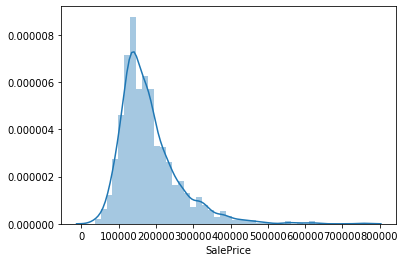

In [7]:
sns.distplot(train["SalePrice"])

**La variable target está sesgada a la derecha y podemos ver que tiene outliers marcados**

In [8]:
plt.style.use("fivethirtyeight")

# Data Quality

**Mapa de Missings**

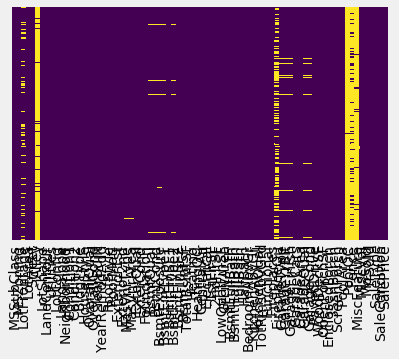

In [9]:
sns.heatmap(train.isnull(),xticklabels=True,yticklabels=False,cbar=False,cmap='viridis')

**El color amarillo representa los missings, podemos ver varias columnas que casi están vacías en su totalidad, por tanto anlizaremos cual es la proporción de missings por columna que tenemos..**

**Quitar variables con mas del 50% de missings**

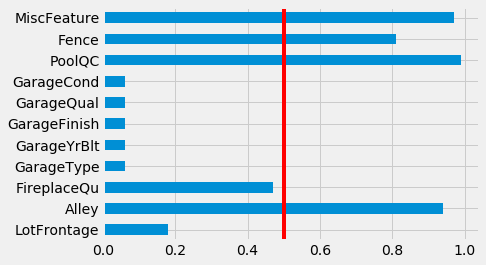

In [10]:
vars=np.round((train.isnull()).sum()/len(train),2)
vars[vars>.05].plot(kind="barh")
plt.axvline(x=0.5,color="r")

Podemos ver que tenemos 4 variables con más del 50% de valores missing las cuales vamos a quitra para el análisis, estas son :

In [11]:
bye=vars[vars>.5].index
bye

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [12]:
train=train.drop(bye,axis=1)
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
760           20       RL         70.0     9100   Pave      Reg         Lvl   
962          160       RL         24.0     2308   Pave      Reg         Lvl   
954           90       RL         35.0     9400   Pave      IR1         Lvl   
1286          20       RL          NaN     9790   Pave      Reg         Lvl   
1024          20       RL          NaN    15498   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
760     AllPub    Inside       Gtl  ...             0         0           0   
962     AllPub    Corner       Gtl  ...             0         0           0   
954     AllPub   CulDSac       Gtl  ...             0         0           0   
1286    AllPub    Inside       Gtl  ...             0         0           0   
1024    AllPub    Corner       Gtl  ...           174         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
760         0     450      10    2009        WD         Normal    127500  
962         0       0       7    2007        WD         Normal    155000  
954         0       0      10    2006        WD        AdjLand    127500  
1286        0       0       6    2010        WD         Normal    143000  
1024        0       0       5    2008       COD        Abnorml    287000  

[5 rows x 76 columns]

**Analizamos los datos categóricos**

Para el análisis de datos categóricos nos interesa ver la distribución de categorías por cada una de las variables ya que si la mayoría de los datos estuviera en 1 sola no habrá información que nos aporte esa variable y por tanto conviene desecharla...

In [13]:
descat=train.select_dtypes("object").describe()#.loc["unique"]
descat

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1168   1168     1168        1168      1168      1168      1168   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq        922   1163      725        1054      1167       834      1110   

       Neighborhood Condition1 Condition2  ... KitchenQual Functional  \
count          1168       1168       1168  ...        1168       1168   
unique           25          9          8  ...           4          7   
top           NAmes       Norm       Norm  ...          TA        Typ   
freq            185       1009       1153  ...         582       1095   

       FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count          622       1101         1101       1101       1101       1168   
unique           5          6            3          5          5          3   
top             Gd     Attchd          Unf         TA         TA          Y   
freq           309        697          478       1046       1062       1073   

       SaleType SaleCondition  
count      1168          1168  
unique        9             6  
top          WD        Normal  
freq       1009           953  

[4 rows x 39 columns]

**Quitamos variables cuyo valor mas frecuente está en más del 95% de los datos**

Street        0.995719
Utilities     0.999144
LandSlope     0.950342
Condition2    0.987158
RoofMatl      0.982877
Heating       0.978596
GarageQual    0.950045
GarageCond    0.964578
dtype: object

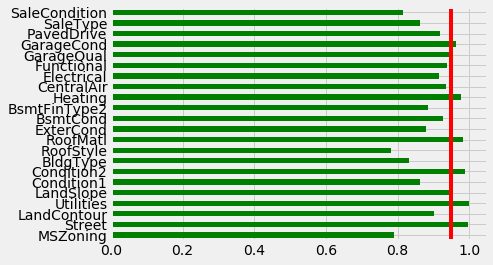

In [14]:
byecat=descat.loc["freq"]/descat.loc["count"]
byecat[byecat>.75].plot(kind="barh",color="g")
plt.axvline(x=0.95,color="r")
byecat[byecat>.95]

In [15]:
train=train.drop(byecat[byecat>.95].index,axis=1)
train.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
760           20       RL         70.0     9100      Reg         Lvl   
962          160       RL         24.0     2308      Reg         Lvl   
954           90       RL         35.0     9400      IR1         Lvl   
1286          20       RL          NaN     9790      Reg         Lvl   
1024          20       RL          NaN    15498      IR1         Lvl   

     LotConfig Neighborhood Condition1 BldgType  ... EnclosedPorch  3SsnPorch  \
760     Inside        NAmes       Norm     1Fam  ...             0          0   
962     Corner      NPkVill       Norm   TwnhsE  ...             0          0   
954    CulDSac      Edwards       Norm   Duplex  ...             0          0   
1286    Inside       NWAmes      Feedr     1Fam  ...             0          0   
1024    Corner       Timber       Norm     1Fam  ...           174          0   

      ScreenPorch  PoolArea  MiscVal MoSold YrSold SaleType SaleCondition  \
760             0         0      450     10   2009       WD        Normal   
962             0         0        0      7   2007       WD        Normal   
954             0         0        0     10   2006       WD       AdjLand   
1286            0         0        0      6   2010       WD        Normal   
1024            0         0        0      5   2008      COD       Abnorml   

      SalePrice  
760      127500  
962      155000  
954      127500  
1286     143000  
1024     287000  

[5 rows x 68 columns]

In [16]:
#housing.info()

**Analizamos las variables numéricas**

Buscamos eliminar aquellas variables con poca varianza ya que estas no aportan información para predecir..

In [17]:
descnum=train.select_dtypes(["float64","int64"]).describe()
descnum

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000   959.000000    1168.000000  1168.000000  1168.000000   
mean     57.003425    70.014599   10509.316781     6.112158     5.583048   
std      42.391168    25.174460   10582.594683     1.399690     1.109260   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    58.500000    7572.750000     5.000000     5.000000   
50%      50.000000    69.000000    9475.000000     6.000000     5.000000   
75%      70.000000    80.000000   11608.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1168.000000   1168.000000  1162.000000  1168.000000  1168.000000  ...   
mean   1971.601884   1984.976884   105.911360   435.053082    46.491438  ...   
std      30.166148     20.761641   181.338059   456.069145   160.534262  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000  ...   
50%    1972.000000   1994.000000     0.000000   370.000000     0.000000  ...   
75%    2001.000000   2004.000000   168.000000   705.250000     0.000000  ...   
max    2010.000000   2010.000000  1378.000000  5644.000000  1120.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     92.462329    48.227740      21.754281     3.001712    15.369863   
std     121.978563    67.629868      62.111728    26.207955    57.416085   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    70.000000       0.000000     0.000000     0.000000   
max     670.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      2.973459     41.424658     6.296233  2007.835616  181061.186644  
std      41.890850    532.947315     2.691429     1.326171   79444.433095  
min       0.000000      0.000000     1.000000  2006.000000   35311.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129500.000000  
50%       0.000000      0.000000     6.000000  2008.000000  164000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

**Si el 75% de los datos de una varible son iguales entonces la vamos a quitar para el modelo ya que tiene poca varianza**

In [18]:
byenum=descnum.loc["75%"]==descnum.loc["min"]
byenum[byenum]

BsmtFinSF2       True
LowQualFinSF     True
BsmtHalfBath     True
EnclosedPorch    True
3SsnPorch        True
ScreenPorch      True
PoolArea         True
MiscVal          True
dtype: bool

In [19]:
descnum[byenum[byenum].index]

BsmtFinSF2  LowQualFinSF  BsmtHalfBath  EnclosedPorch    3SsnPorch  \
count  1168.000000   1168.000000   1168.000000    1168.000000  1168.000000   
mean     46.491438      6.535959      0.060788      21.754281     3.001712   
std     160.534262     51.010933      0.246108      62.111728    26.207955   
min       0.000000      0.000000      0.000000       0.000000     0.000000   
25%       0.000000      0.000000      0.000000       0.000000     0.000000   
50%       0.000000      0.000000      0.000000       0.000000     0.000000   
75%       0.000000      0.000000      0.000000       0.000000     0.000000   
max    1120.000000    572.000000      2.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal  
count  1168.000000  1168.000000   1168.000000  
mean     15.369863     2.973459     41.424658  
std      57.416085    41.890850    532.947315  
min       0.000000     0.000000      0.000000  
25%       0.000000     0.000000      0.000000  
50%       0.000000     0.000000      0.000000  
75%       0.000000     0.000000      0.000000  
max     480.000000   738.000000  15500.000000

Podemos ver que 75% de los datos en estas variables son 0

**Eliminamos variables númericas que tienen el mismo valor en el 75% de los casos i. e. poca varianza**

In [20]:
train=train.drop(byenum[byenum].index,axis=1)
train.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
760           20       RL         70.0     9100      Reg         Lvl   
962          160       RL         24.0     2308      Reg         Lvl   
954           90       RL         35.0     9400      IR1         Lvl   
1286          20       RL          NaN     9790      Reg         Lvl   
1024          20       RL          NaN    15498      IR1         Lvl   

     LotConfig Neighborhood Condition1 BldgType  ... GarageCars  GarageArea  \
760     Inside        NAmes       Norm     1Fam  ...          1         300   
962     Corner      NPkVill       Norm   TwnhsE  ...          2         440   
954    CulDSac      Edwards       Norm   Duplex  ...          0           0   
1286    Inside       NWAmes      Feedr     1Fam  ...          2         528   
1024    Corner       Timber       Norm     1Fam  ...          2         665   

      PavedDrive  WoodDeckSF  OpenPorchSF MoSold YrSold SaleType  \
760            Y           0            0     10   2009       WD   
962            Y          48            0      7   2007       WD   
954            Y           0            0     10   2006       WD   
1286           Y           0           26      6   2010       WD   
1024           Y           0           72      5   2008      COD   

     SaleCondition  SalePrice  
760         Normal     127500  
962         Normal     155000  
954        AdjLand     127500  
1286        Normal     143000  
1024       Abnorml     287000  

[5 rows x 60 columns]

# Importancia de Variables

**Correlaciones de Variables numéricas vs. la variable Objetivo**

Analizamos la correlación de cada variable numérica con la variable objetivo para ver cuales son las más importantes recordar que mientras más cercanas a 0 no nos sirven puesto que no tienen relación lineal con el target.

In [21]:
corh=train.corr()
sal=corh[["SalePrice"]].drop("SalePrice",axis=0)#.plot(kind="barh")
sal=sal.sort_values(by="SalePrice",ascending=False)
#sal

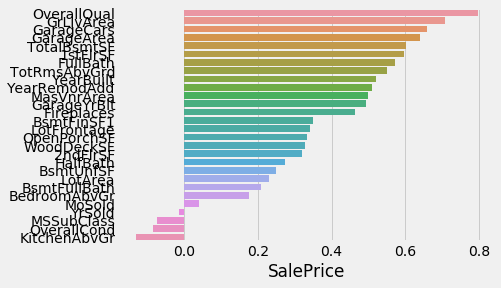

In [22]:
sns.barplot(y=sal.index,x="SalePrice",data=sal)

**Vamos a quedarnos sólo las variables con una correlación mayor a $|0.05|$**

In [23]:
#sal

In [24]:
numscor=corh[abs(corh["SalePrice"])>.05]
print(f"Sólo nos quedamos con {len(numscor.index)} variables continuas")

Sólo nos quedamos con 27 variables continuas


# EDA 

Una vez hecho el data quiality y la selección de variables por correlación vamos a ver la distribución de cada una de ellas...

/home/abraham/anaconda4/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/abraham/anaconda4/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


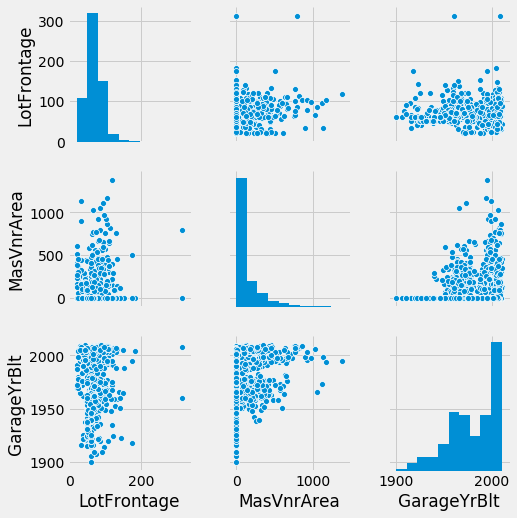

In [25]:
sns.pairplot(train.select_dtypes("float64"))

AL ver las distribuciones de las variables continuas notamos que están sesgadas esto sugiere una posible normalización...

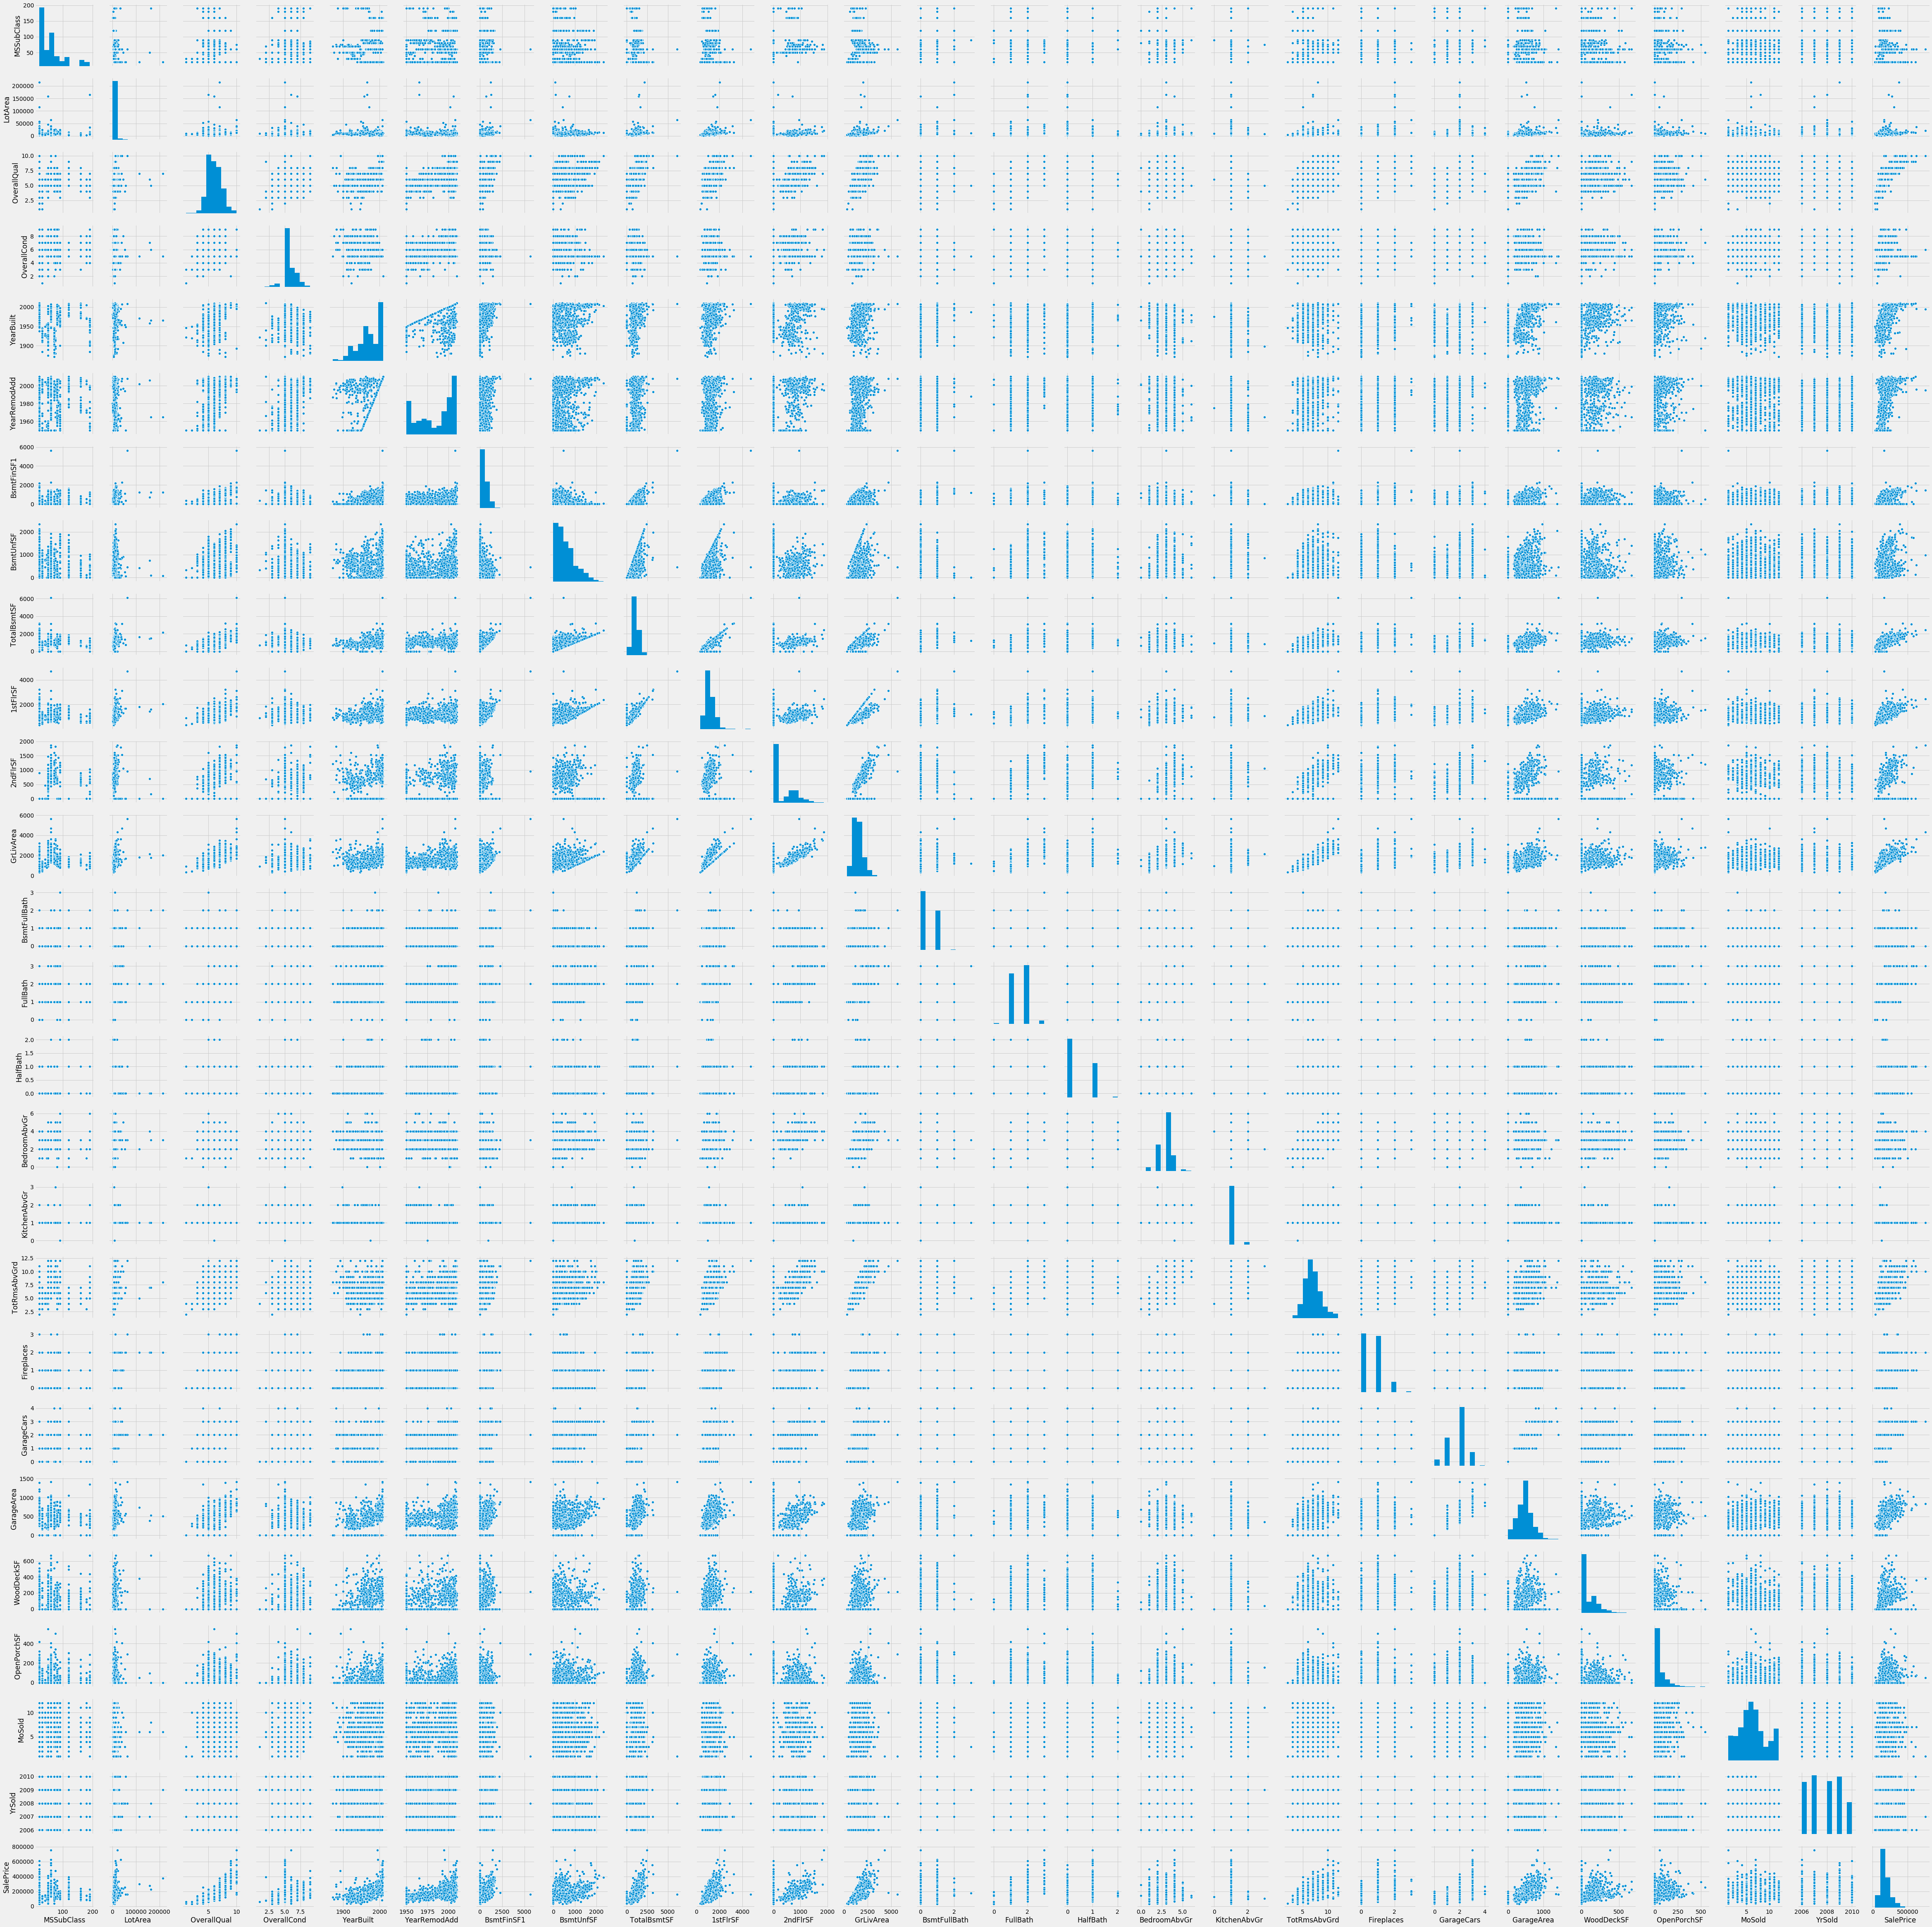

In [26]:
sns.pairplot(train.select_dtypes("int64"))

Para las variables de tipo int podemos ver algunos casos donde las distibuciones parecen más gráficos de barras con pocas categorías esto sugiere quizás analizar estas como categóricas u ordinales en vez de tipo continuo..

In [27]:
ncorbye=corh[abs(corh["SalePrice"])<=.05].index
train=train.drop(ncorbye,axis=1)
train.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
760           20       RL         70.0     9100      Reg         Lvl   
962          160       RL         24.0     2308      Reg         Lvl   
954           90       RL         35.0     9400      IR1         Lvl   
1286          20       RL          NaN     9790      Reg         Lvl   
1024          20       RL          NaN    15498      IR1         Lvl   

     LotConfig Neighborhood Condition1 BldgType  ... GarageYrBlt  \
760     Inside        NAmes       Norm     1Fam  ...      2008.0   
962     Corner      NPkVill       Norm   TwnhsE  ...      1976.0   
954    CulDSac      Edwards       Norm   Duplex  ...         NaN   
1286    Inside       NWAmes      Feedr     1Fam  ...      1963.0   
1024    Corner       Timber       Norm     1Fam  ...      1976.0   

      GarageFinish  GarageCars  GarageArea  PavedDrive WoodDeckSF OpenPorchSF  \
760            Unf           1         300           Y          0           0   
962            Unf           2         440           Y         48           0   
954            NaN           0           0           Y          0           0   
1286           Unf           2         528           Y          0          26   
1024           Fin           2         665           Y          0          72   

     SaleType SaleCondition  SalePrice  
760        WD        Normal     127500  
962        WD        Normal     155000  
954        WD       AdjLand     127500  
1286       WD        Normal     143000  
1024      COD       Abnorml     287000  

[5 rows x 58 columns]

**Análisis de variables int, En realidad lo son?**

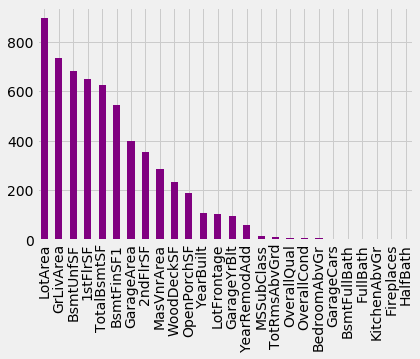

In [28]:
(train.select_dtypes(["int64","float64"]).drop("SalePrice",axis=1).astype(str).describe()).loc["unique"].sort_values(ascending=False).plot(kind="bar",color="purple")

**Es claro que  a partir de la variable MSSubclass estas deben ser tratadas como categoricas** 

In [29]:
ints=pd.DataFrame(train.select_dtypes("int64").drop("SalePrice",axis=1).astype(str).describe().loc["unique"])
retype=ints[ints["unique"]<50].index
for col in retype:
    train[col]=train[col].astype(object)

In [30]:
print(f"El número de variables que vamos a pasar de int a categoricas son {len(retype)}")
retype

El número de variables que vamos a pasar de int a categoricas son 11


Index(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars'],
      dtype='object')

Boxplots de categóricas...

In [31]:
plt.style.use("ggplot")

In [32]:
def catebox(var):
    sns.boxplot( x=train[var], y=train["SalePrice"]);
    plt.show()
    
interact(catebox,var=train.select_dtypes("object").columns)    

interactive(children=(Dropdown(description='var', options=('MSSubClass', 'MSZoning', 'LotShape', 'LandContour'…

<function __main__.catebox(var)>

Podemos ver la variable "OverallQuall" es la que más diferencia por categoría tiene de hecho es una variable ordinal, y recordando también es la que más correlación teien con el traget o variable objetivo...

# Pipeline

**hacemos un pipeline diferenciado para variables numéricas y categoricas**

**Numéricas:** imputamos missings con la mediana, y estandarizamos los datos.

**Categóricas:** imputamos missings con una categoría y hacemos variables dummies con oneHot encoder.

Finalmente aplicamos este proceso a todos los datos.

**LabelEncoder**.- en vez de hacer variables dummies hacemos etiquetas por categoría.

In [33]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        #if self.columns is not None:
        for col in range(output.shape[1]):
                #print(col)
            output[:,col] = LabelEncoder().fit_transform(output[:,col])
        #else:
        #    for colname,col in output.iteritems():
         #       output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

**Logtransform**.-Creamos una clase para transformar datos en logaritmo natural de cada columna:

$$
arglog(n) = \left \{ \begin{matrix} -log(|n|) & \mbox{si }n<0
\\ log(n+1) & \mbox{si }n\ge0\end{matrix}\right. 
$$

**Recordar que se quieren normalizar los datos por ello se les aplica dicha transformación**

In [34]:
class MultiColumnLogTrans:
    import numpy as np
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here
    

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        np.log(). If no columns specified, transforms all
        columns in X.
        '''
        def arglog(x):
            x=float(x)
            if x<0:
                sal=-np.log(abs(x))
            else:
                sal=np.log(x+1)
            return sal
        
        output = X.copy().astype(float)
        for col in range(output.shape[1]):
            
            
            #print(col)
                
            output[:,col] = np.array(list(map(arglog,output[:,col])))
            #LabelEncoder().fit_transform(output[:,col])

        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

**Pipelines para numericas**

In [35]:
numeric_features=list(train.select_dtypes("int64").drop('SalePrice',axis=1).columns)+list(train.select_dtypes("float64").columns)
#numscor.drop('SalePrice',axis=0).index#

numeric_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

numeric_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),('trans',MultiColumnLogTrans())])

numeric_transformer3 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])

**Pipelines para categóricas**

In [36]:
categorical_features =train.select_dtypes("object").columns

categorical_transformer1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

categorical_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('le', MultiColumnLabelEncoder())])

Se probaron las distintas combinaciones de pipelines y por mejores resultados en las transformaciones de las variables nos quedamos con el siguiente:

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer2, numeric_features),
        ('cat', categorical_transformer1, categorical_features)])

# Train_test_split

**Antes de separar la variable target y los datos para predecir, vamos a hacer una transformación de la variable target, dado que estaba sesgada a la derecha vamos a aplicarle la función $y=log(y+1)$ para normalizarla, recordar que muchos de los modelos de machine learning parten del supuesto que nuestros datos se distribuyen normal, por ello usamos el logaritmo ya que este abre valores compactos y reduce valores grandes**

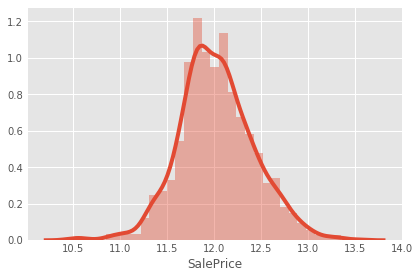

In [38]:
sns.distplot(np.log1p(train["SalePrice"]),norm_hist=True)


# Tranformación de variable target

**Por tanto nuestro nuevo target será $log(y+1)$ pero debemos recordar que para haer las predicciones debemos regresar a su escala original esto lo haremos usando la función $e^{log(y+1)}-1=y$**

In [39]:
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"]
print(ytrain)
ytrain=np.log1p(ytrain)
xtrain.head()

760     127500
962     155000
954     127500
1286    143000
1024    287000
         ...  
750      96500
389     426000
148     141000
1049     84900
1396    160000
Name: SalePrice, Length: 1168, dtype: int64


MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
760          20       RL         70.0     9100      Reg         Lvl    Inside   
962         160       RL         24.0     2308      Reg         Lvl    Corner   
954          90       RL         35.0     9400      IR1         Lvl   CulDSac   
1286         20       RL          NaN     9790      Reg         Lvl    Inside   
1024         20       RL          NaN    15498      IR1         Lvl    Corner   

     Neighborhood Condition1 BldgType  ... GarageType GarageYrBlt  \
760         NAmes       Norm     1Fam  ...     Detchd      2008.0   
962       NPkVill       Norm   TwnhsE  ...     Detchd      1976.0   
954       Edwards       Norm   Duplex  ...        NaN         NaN   
1286       NWAmes      Feedr     1Fam  ...     Attchd      1963.0   
1024       Timber       Norm     1Fam  ...     Attchd      1976.0   

     GarageFinish  GarageCars  GarageArea PavedDrive WoodDeckSF OpenPorchSF  \
760           Unf           1         300          Y          0           0   
962           Unf           2         440          Y         48           0   
954           NaN           0           0          Y          0           0   
1286          Unf           2         528          Y          0          26   
1024          Fin           2         665          Y          0          72   

     SaleType  SaleCondition  
760        WD         Normal  
962        WD         Normal  
954        WD        AdjLand  
1286       WD         Normal  
1024      COD        Abnorml  

[5 rows x 57 columns]

# transformación de variables

Con el pipeline que se construyó aplicamos arglog a todas aquellas variables que quedaron como numéricas..

/home/abraham/anaconda4/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log1p
  """Entry point for launching an IPython kernel.
/home/abraham/anaconda4/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/abraham/anaconda4/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


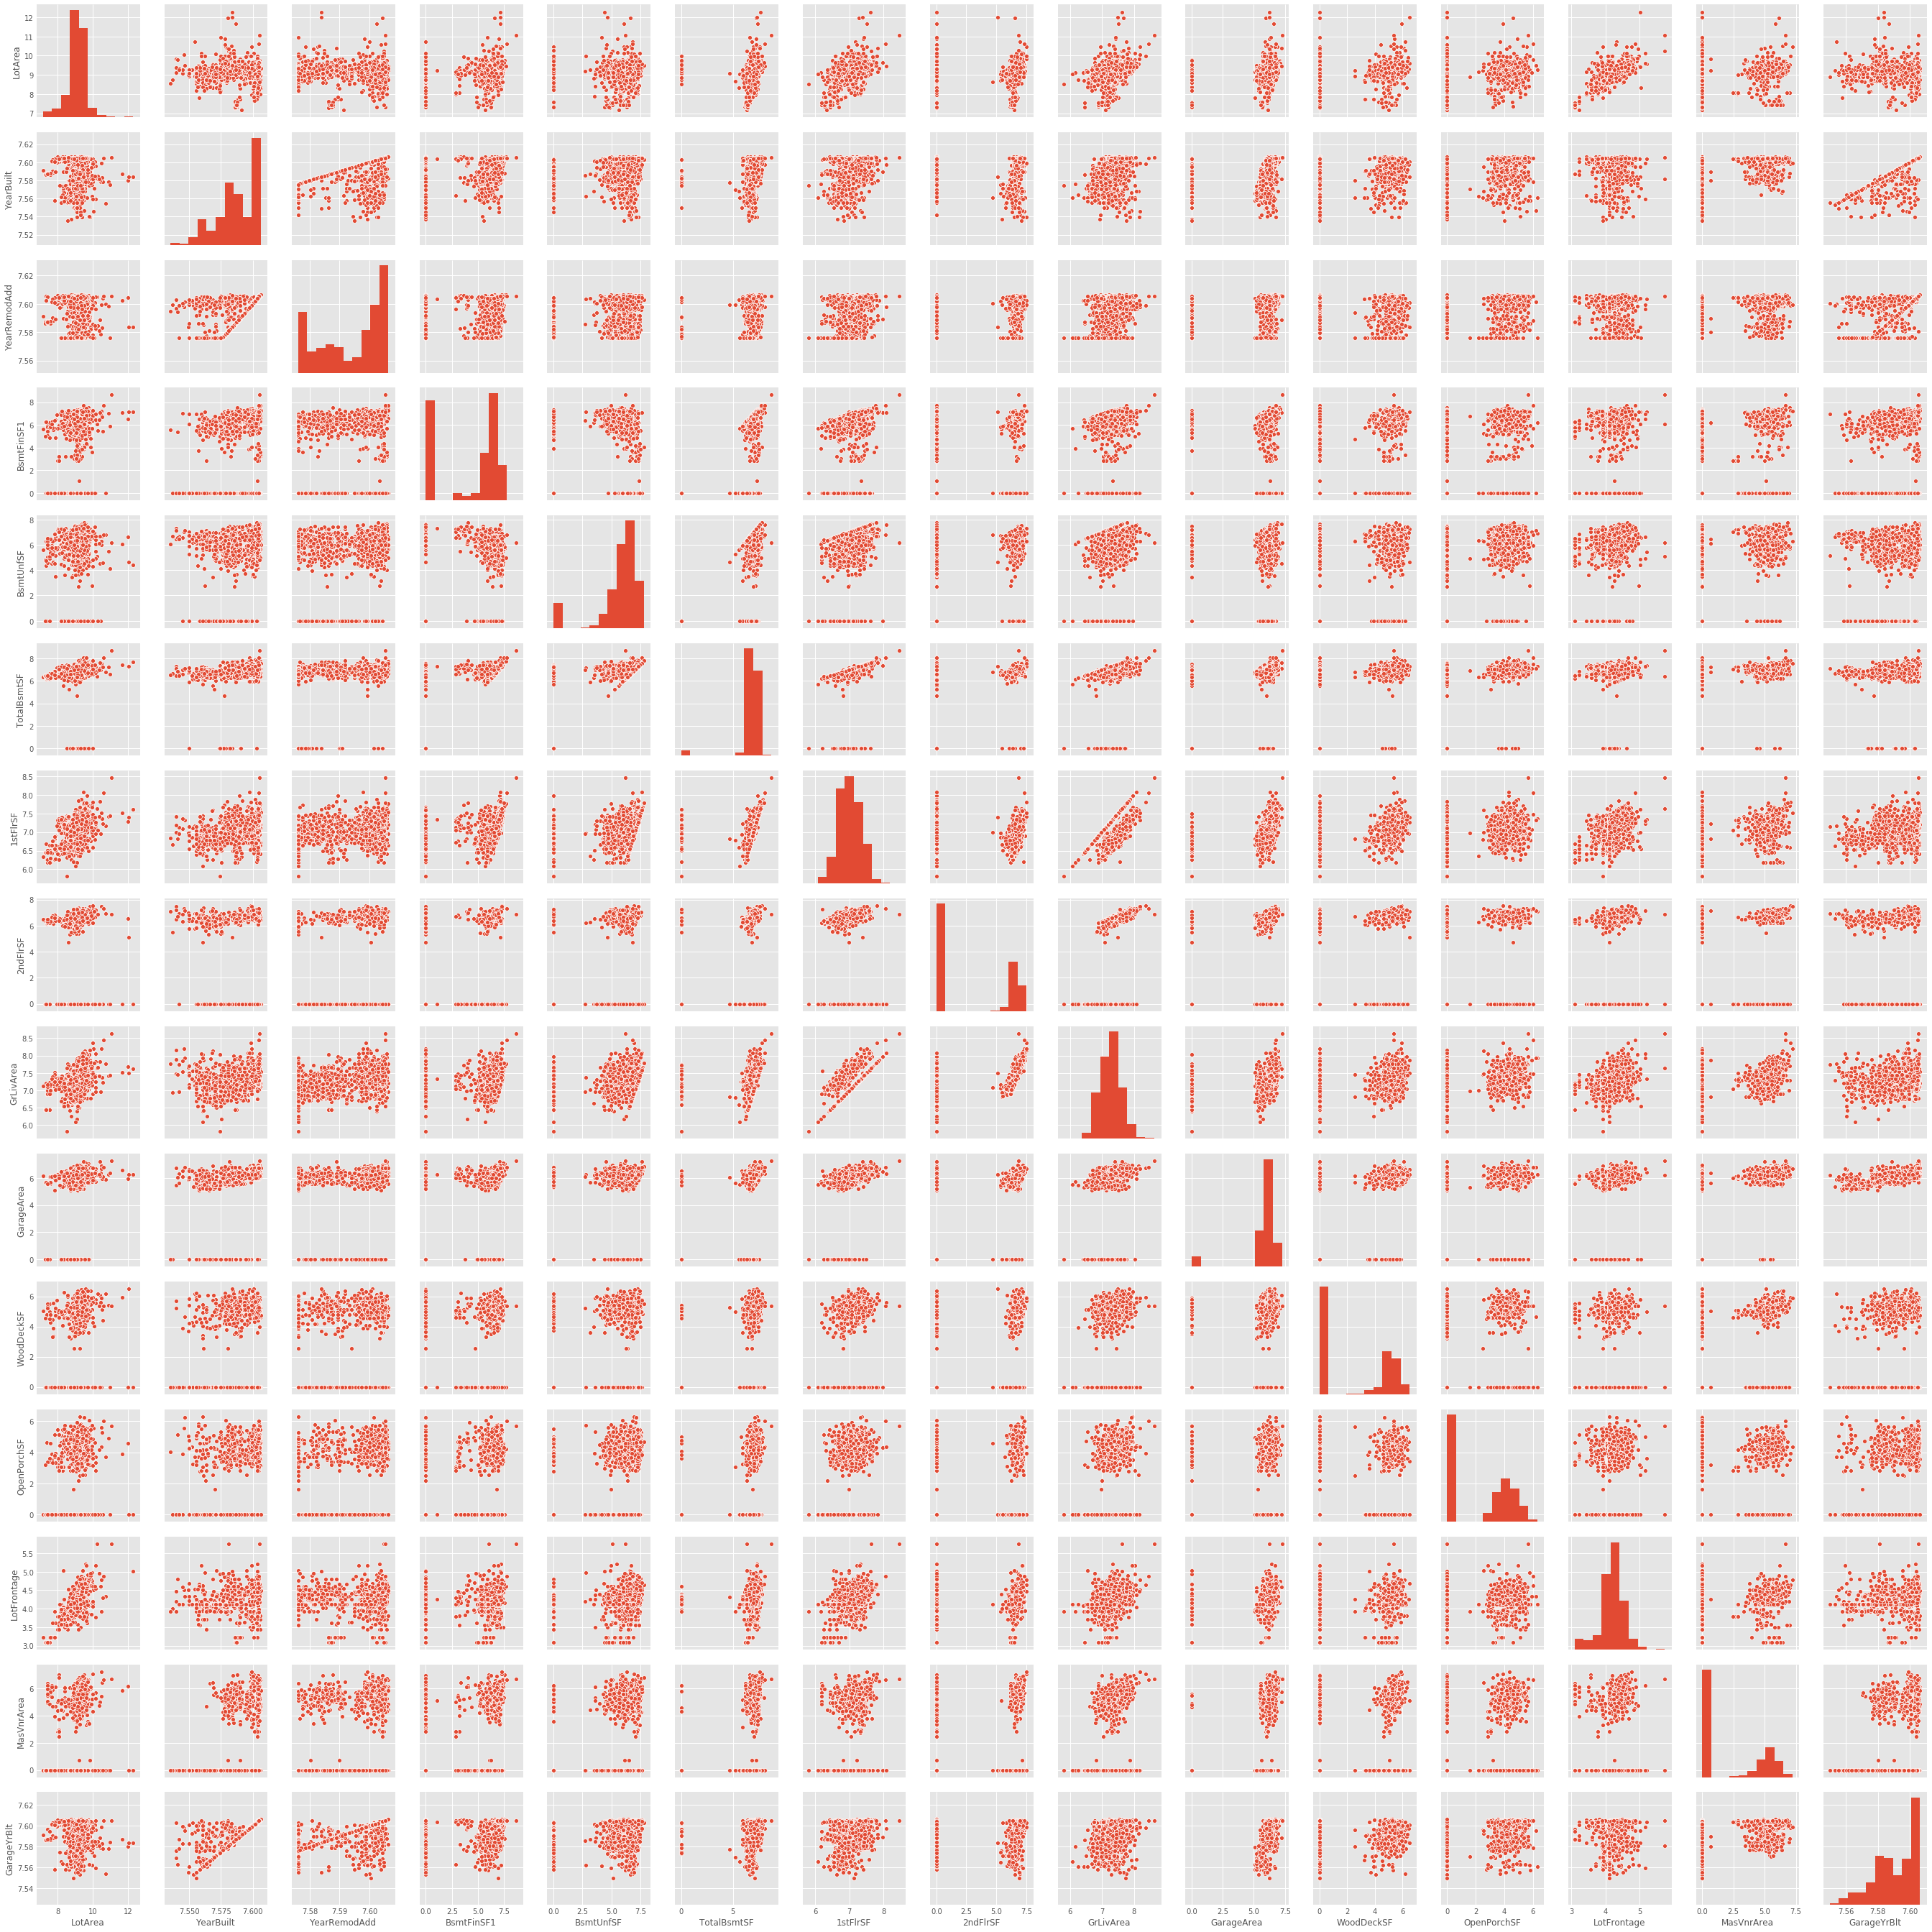

In [40]:
sns.pairplot(np.log1p(xtrain[numeric_features]))

# Métricas para seleción de modelos

**Recordar que el objetivo del ejercicio es:**

$$
max\ R^2\\min MAE
$$

**Para esto vamos a crear 2 funciones que midan la $R^2$ y el $MAE$ sobre la variable original además de tener las respectivas métricas de sobre $log(y+1)$**

In [41]:
def r2l(y_true, y_predict):
  y_true = np.array(y_true)
  y_predict = np.array(y_predict)
  return (r2_score(np.expm1(y_true),np.expm1(y_predict)))

def mael(y_true, y_predict):
  y_true = np.array(y_true)
  y_predict = np.array(y_predict)
  return (-mean_absolute_error(np.expm1(y_true),np.expm1(y_predict)))

r2A_scorer = {"r2":"r2","my":make_scorer(r2l, greater_is_better=True),"neg_mean_absolute_error":"neg_mean_absolute_error",
             "mael":make_scorer(mael, greater_is_better=False)}

# Magic Loop

Creamos una función que pueda comparar distintos modelos con distintos parámetros usando gridsearch para seleccionar el mejor de ellos con respecto a su $R^2$ en este caso

# Iteración 1 Modelos a competir..

**Vamos a entrenar una regresión lineal, ridge y lasso para estimar log(precios) dado que son los candidatos naturales para problemas de regresión y además vamos aprobar con 1 técnica de bagging el random forest recordar que este algoritmocrea muchos árboles basados en muestras con reemplazos y el promedio de las estimaciones es la predicción final y también probaremos gradient boosting y adaboost como técnica boosting para ir corrigiendo los errores mediante la ponderación mayor de los casos que más diferencia presentan vs. el dato real, todo esto se hace usando gridsearchcv creando 2 modelos uno que sea el mejor con respecto al mae y otro con respecto a la $R^2$...también considerareos un SVR probando cual es esl kernel que mejor ajusta asi la C que es el limite de $\alpha$**

Definición de diccionario de hiperparametros y modelos...

In [42]:
rane=314
def define_hyper_params():
    """
        Esta función devuelve un diccionario con
        los clasificadores que vamos a utilizar y
        una rejilla de hiperparámetros
    """
    ## Por ejemplo
    # Create space of candidate learning algorithms and their hyperparameters
    classifier = {
         'Lasso': Lasso()
     }
    
    search_space = [
        {'classifier': [Lasso(tol=0.5,random_state=rane)],
                 'classifier__alpha': [6,6.1,6.2,6.5,6.7,6.9,7,7.2,7.4,7.6,7.8,8,9,10,15,20,25,30]#[0.1 * 10 ** (i/2) for i in range(1, 11)],
                 },
                {'classifier': [Ridge(tol=.5,random_state=rane)],
                 'classifier__alpha': [6,6.1,6.2,6.5,6.7,6.9,7,7.2,7.4,7.6,7.8,8,9,10,15,20,25,30],#[0.1 * 10 ** (i/2) for i in range(1, 11)],
                 'classifier__normalize':[True,False] 
                },
                   {'classifier': [SVR()],
                 'classifier__C': [i for i in range(1,5)],
                    'classifier__kernel':["linear","poly","rgf"],
                   },
                   {'classifier': [AdaBoostRegressor(DecisionTreeRegressor(max_depth=1),random_state=rane)],
                 'classifier__n_estimators': [i for i in range(1,26)],
#                    'classifier__fit_intercept':[True,False],
                   },
                    {'classifier':[GradientBoostingRegressor(random_state=rane)],
                     'classifier__max_depth':[i for i in range(1,7)],
                      'classifier__n_estimators':[100,500,1000],
#                     'classifier__oob_score':[True,False]
                    },
                   {'classifier': [RandomForestRegressor(random_state=rane)],
                 'classifier__n_estimators': [100,200],
                    'classifier__max_depth':[2,4,6,10],
                   }                       
                   ]

    return (classifier,search_space)

In [43]:
    
def magic_loop(metric,X_train, y_train,models_to_run=['Lasso','Ridge','LR','DTR']):
    
       
    classifier,search_space=define_hyper_params()#Modelos y parámetros Definidos que vamos a usar


    pipe = Pipeline([("preprocessor", preprocessor),('classifier', classifier[models_to_run[0]])])

    
    clf = GridSearchCV(pipe, search_space, cv=10, verbose=3,scoring=metric,n_jobs=-1,return_train_score=True)
    
    #ajustamos el mejor modelo
    best_model = clf.fit(X_train, y_train)#ajustamos con el X?train
    cvres = clf.cv_results_
    #obtenemos el mejor modelo y sus parámetros
    win=best_model.best_estimator_.get_params()['classifier']

    print(f'EL {metric} DEL CROSS VAL DEL MODELO GANADOR ES:',best_model.best_score_)
    
    print('Mejor modelo fue:' ,win)
    return(win,cvres)#Regresa el mejor modelo

# Modelos

**Obteniendo los mejores por modelos por $R^2$ y por MAE**

MAE

In [44]:
winner_mae,cvres_mae=magic_loop("neg_mean_absolute_error",xtrain, ytrain)

Fitting 10 folds for each of 117 candidates, totalling 1170 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  6.1min


EL neg_mean_absolute_error DEL CROSS VAL DEL MODELO GANADOR ES: -0.08591605953581662
Mejor modelo fue: Ridge(alpha=7.8, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=314, solver='auto', tol=0.5)


[Parallel(n_jobs=-1)]: Done 1170 out of 1170 | elapsed:  6.4min finished


$R^2$

In [45]:
winner_r2,cvres_r2=magic_loop("r2",xtrain, ytrain)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 117 candidates, totalling 1170 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:  5.3min


EL r2 DEL CROSS VAL DEL MODELO GANADOR ES: 0.8894760259968727
Mejor modelo fue: Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=314, solver='auto', tol=0.5)


[Parallel(n_jobs=-1)]: Done 1170 out of 1170 | elapsed:  6.5min finished


In [46]:
print(f"El mejor modelo por mae es: {winner_mae}")
      
print(f"El mejor modelo por $R^2$ es: {winner_r2}")      

El mejor modelo por mae es: Ridge(alpha=7.8, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=314, solver='auto', tol=0.5)
El mejor modelo por $R^2$ es: Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=314, solver='auto', tol=0.5)


**Creamos los pipelines para hacer el cross validation y medir cada modelo**

In [47]:
neww1= Pipeline([("preprocessor", preprocessor),('winner', winner_mae)])
neww2= Pipeline([("preprocessor", preprocessor),('winner', winner_r2)])

En cada Cross Validation se muesestran 4 métricas:

mean r2: es la $R^2$ de $y$

mean mae: es $MAE(y,\hat{y})$

mean r2t: es la $R^2$ de $log(y+1)$

mean maet: es $MAE(log(y+1),\hat{log(y+1)})$

**Recordar que todo el modelado se hace con $log(y+1)$ y se miden los resultados con está transformación y con la variable original.**

**Medimos los modelos en el cross_validate**

mean r2: 0.86
mean mae: 16,011.98
mean r2t: 0.89
mean maet: 0.09


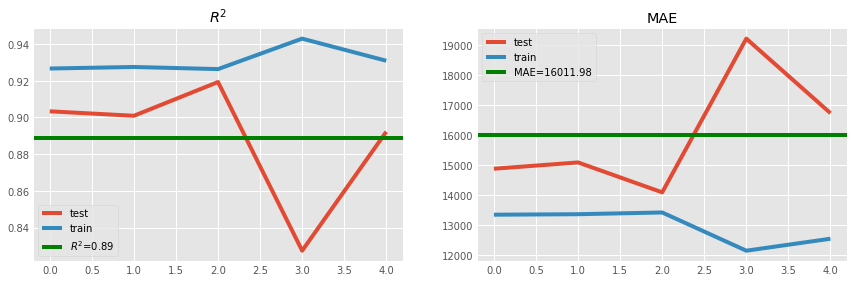

In [48]:
cv = cross_validate(neww1, xtrain, ytrain, cv=5, scoring=r2A_scorer,n_jobs=1,return_train_score=True)
r2 = cv["test_my"]
mae = cv["test_mael"]
r2t = cv["test_r2"]
maet = -cv["test_neg_mean_absolute_error"]
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")
print(f"mean r2t: {r2t.mean():0.2f}")
print(f"mean maet: {maet.mean():,.2f}")
fig, axs = plt.subplots(figsize=(13,4),nrows=1, ncols=2)
axs[0].plot(r2t,label="test")
axs[0].plot(cv["train_r2"],label="train")
axs[0].set_title(r"$R^2$")
axs[0].axhline(y=r2t.mean(),label=f"$R^2$={r2t.mean():0.2f}",color="g")
axs[0].legend()
axs[1].plot(mae,label="test")
axs[1].plot(cv["train_mael"],label="train")
axs[1].set_title("MAE")
axs[1].axhline(y=mae.mean(),label=f"MAE={mae.mean():0.2f}",color="g")
axs[1].legend()

mean r2: 0.86
mean mae: 16,056.42
mean r2t: 0.89
mean maet: 0.09


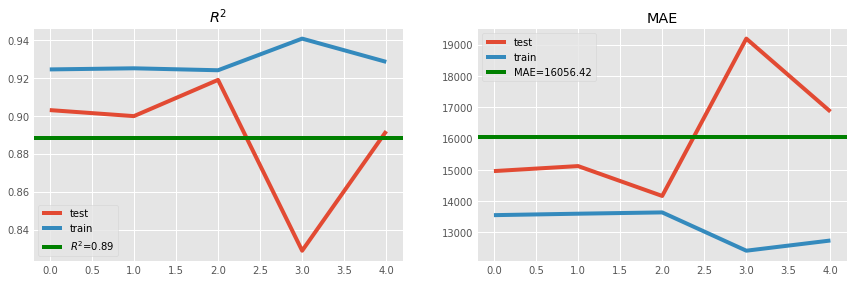

In [49]:
cv = cross_validate(neww2, xtrain, ytrain, cv=5, scoring=r2A_scorer,n_jobs=1,return_train_score=True)
r2 = cv["test_my"]
mae = cv["test_mael"]
r2t = cv["test_r2"]
maet = -cv["test_neg_mean_absolute_error"]
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")
print(f"mean r2t: {r2t.mean():0.2f}")
print(f"mean maet: {maet.mean():,.2f}")
fig, axs = plt.subplots(figsize=(13,4),nrows=1, ncols=2)
axs[0].plot(r2t,label="test")
axs[0].plot(cv["train_r2"],label="train")
axs[0].set_title(r"$R^2$")
axs[0].axhline(y=r2t.mean(),label=f"$R^2$={r2t.mean():0.2f}",color="g")
axs[0].legend()
axs[1].plot(mae,label="test")
axs[1].plot(cv["train_mael"],label="train")
axs[1].set_title("MAE")
axs[1].axhline(y=mae.mean(),label=f"MAE={mae.mean():0.2f}",color="g")
axs[1].legend()

**En ambos modelos podemos ver la r2 es 0.89 y el mae es un poco mejor en neww1 aprox 16mil lo siguiente ser'ver si hacer un bagging de cada modelo podemos mejorar estas métricas, recordar que bagging es 1 modelo y muchas bases con el cual podemos reducir varianza...**

**Bagging neww1, neww2..**

modelo MAE

Pipeline Bagging usamos 200 estimadores para promediar sus resultados

In [50]:
bagnew1=Pipeline([("preprocessor", preprocessor),('bagnew1', BaggingRegressor(winner_mae,n_estimators=200,n_jobs=-1,random_state=rane))])

MAE: 15,874.34
$R^2$ : 0.89


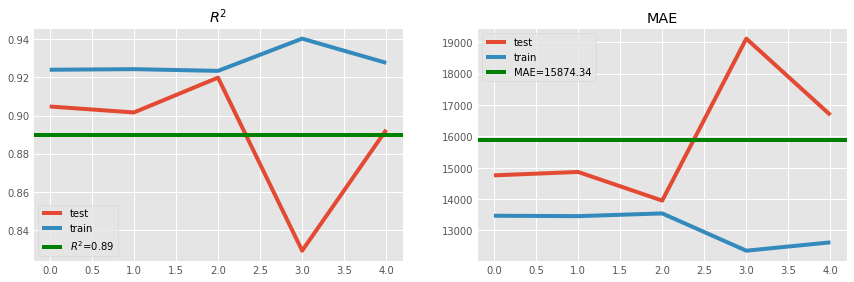

In [51]:
cv = cross_validate(bagnew1,xtrain, ytrain, cv=5, scoring=r2A_scorer,n_jobs=-1,return_train_score=True)
r2 = cv["test_my"]
mae = cv["test_mael"]
r2t = cv["test_r2"]
maet = -cv["test_neg_mean_absolute_error"]
#print(f"mean r2: {r2.mean():0.2f}")
print(f"MAE: {mae.mean():,.2f}")
print(r"$R^2$",f": {r2t.mean():0.2f}")
#print(f"mean maet: {maet.mean():,.2f}")
fig, axs = plt.subplots(figsize=(13,4),nrows=1, ncols=2)
axs[0].plot(r2t,label="test")
axs[0].plot(cv["train_r2"],label="train")
axs[0].set_title(r"$R^2$")
axs[0].axhline(y=r2t.mean(),label=f"$R^2$={r2t.mean():0.2f}",color="g")
axs[0].legend()
axs[1].plot(mae,label="test")
axs[1].plot(cv["train_mael"],label="train")
axs[1].set_title("MAE")
axs[1].axhline(y=mae.mean(),label=f"MAE={mae.mean():0.2f}",color="g")
axs[1].legend()

Modelo r2

Pipeline Bagging...

In [52]:
bagnew2=Pipeline([("preprocessor", preprocessor),('bagnew2', BaggingRegressor(winner_r2,n_estimators=200,n_jobs=-1,random_state=rane))])

mean r2: 0.86
mean mae: 15,961.38
mean r2t: 0.89
mean maet: 0.09


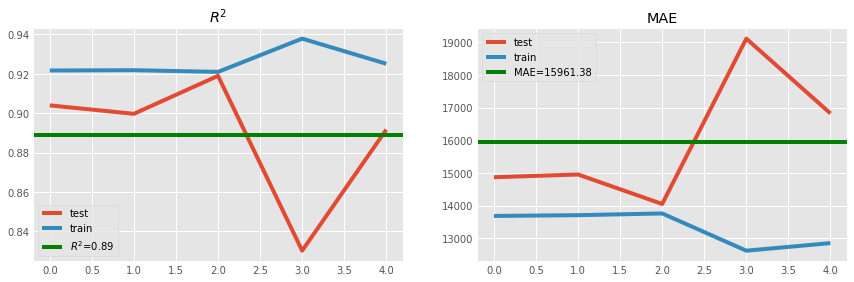

In [53]:
#ejx_r2=BaggingRegressor(winner_r2,n_estimators=200,n_jobs=-1) #Bagging
cv = cross_validate(bagnew2,xtrain, ytrain, cv=5, scoring=r2A_scorer,n_jobs=-1,return_train_score=True)
r2 = cv["test_my"]
mae = cv["test_mael"]
r2t = cv["test_r2"]
maet = -cv["test_neg_mean_absolute_error"]
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")
print(f"mean r2t: {r2t.mean():0.2f}")
print(f"mean maet: {maet.mean():,.2f}")
fig, axs = plt.subplots(figsize=(13,4),nrows=1, ncols=2)
axs[0].plot(r2t,label="test")
axs[0].plot(cv["train_r2"],label="train")
axs[0].set_title(r"$R^2$")
axs[0].axhline(y=r2t.mean(),label=f"$R^2$={r2t.mean():0.2f}",color="g")
axs[0].legend()
axs[1].plot(mae,label="test")
axs[1].plot(cv["train_mael"],label="train")
axs[1].set_title("MAE")
axs[1].axhline(y=mae.mean(),label=f"MAE={mae.mean():0.2f}",color="g")
axs[1].legend()

**Aunque $R^2$ no mejora con el bagging,recordar que esto es esparado dado que el bagging reduce varianza, pero  si lo hace el mae sobretodo con el modelo mae por tanto si ayuda el bagging**

**Voting.- que pasa si combinamos varios modelos usaremos algunos de los que se probaron en el magic loop para ver como funcionan en conjunto con los ganadores, recordar que el voting funciona usando el promedio de las predicciones de cada modelo, en este caso no hay hard o soft porque es un problema de regresión no de clasificación...**

In [54]:
er = VotingRegressor([('win1', winner_mae),('win2', winner_r2), ('DT', RandomForestRegressor(n_estimators=1000,max_features="auto",random_state=rane)),('gdr',GradientBoostingRegressor(max_depth=2,n_estimators=1000,random_state=rane))])
votenew=Pipeline([("preprocessor", preprocessor),('vote',er)]) #pipeline para voting

mean r2: 0.88
mean mae: 15,084.59
mean r2t: 0.90
mean maet: 0.08


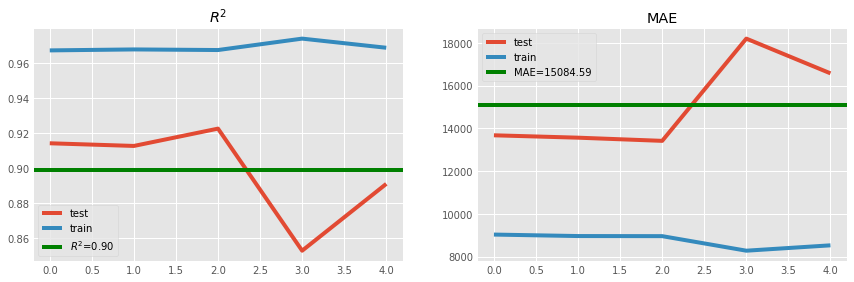

In [55]:
cv = cross_validate(votenew,xtrain, ytrain, cv=5, scoring=r2A_scorer,n_jobs=-1,return_train_score=True)
r2 = cv["test_my"]
mae = cv["test_mael"]
r2t = cv["test_r2"]
maet = -cv["test_neg_mean_absolute_error"]
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")
print(f"mean r2t: {r2t.mean():0.2f}")
print(f"mean maet: {maet.mean():,.2f}")
fig, axs = plt.subplots(figsize=(13,4),nrows=1, ncols=2)
axs[0].plot(r2t,label="test")
axs[0].plot(cv["train_r2"],label="train")
axs[0].set_title(r"$R^2$")
axs[0].axhline(y=r2t.mean(),label=f"$R^2$={r2t.mean():0.2f}",color="g")
axs[0].legend()
axs[1].plot(mae,label="test")
axs[1].plot(cv["train_mael"],label="train")
axs[1].set_title("MAE")
axs[1].axhline(y=mae.mean(),label=f"MAE={mae.mean():0.2f}",color="g")
axs[1].legend()

**El voting muestra una $R^2=.9$ mejora y también reduce el mae...**

**Dentro de los detalles importantes del voting,en el cross validation se ve una tendencia de overfitting dadas las separaciones entre las líneas de train y test de cada iteración, quizás haciendo un bagging del voting podemos reducir varianza aunque por el tamañano del proceso no lo haremos ya que no termina por la memoria.**

**Boosting...**

Veamos que sucede usando cada modelo en un proceso adaboost podemos iterar sobre el numero de modelos o estimators para seleccionar el mejor parametro...

Text(0.5, 1.0, 'MAE')

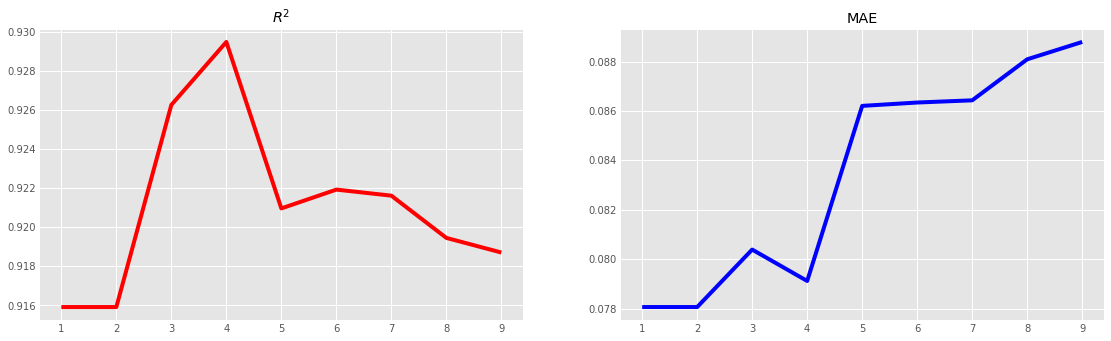

In [56]:
err_r2,err_mae=[],[]
for i in range(1,10):
    ada_clf = AdaBoostRegressor(winner_mae,n_estimators=i,random_state=rane)
    ada_clf.fit(preprocessor.fit_transform(xtrain),ytrain)
    erri=r2_score(ytrain,ada_clf.predict(preprocessor.fit_transform(xtrain)))
    errm=mean_absolute_error(ytrain,ada_clf.predict(preprocessor.fit_transform(xtrain)))
    err_r2.append(erri)
    err_mae.append(errm)
    
fig = plt.figure(figsize=(17,5))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)    
ax.plot(list(range(1,10)),err_r2,color="r")
ax.set_title(r"$R^2$")
ax2.plot(list(range(1,10)),err_mae,color="b")
ax2.set_title("MAE")

In [57]:
err_r2.index(max(err_r2))+1

4

In [58]:
print(f"Para $R^2$ usamos n_estimators={err_r2.index(max(err_r2))+1} y para mae {err_mae.index(min(err_mae))+1} es donde queremos los resultados")

Para $R^2$ usamos n_estimators=4 y para mae 1 es donde queremos los resultados


In [59]:
adapipe1=Pipeline([("preprocessor", preprocessor),('adab',AdaBoostRegressor(winner_mae,n_estimators=err_mae.index(min(err_mae))+1,random_state=rane))])

mean r2: 0.86
mean mae: 16,729.96
mean r2t: 0.88
mean maet: 0.09


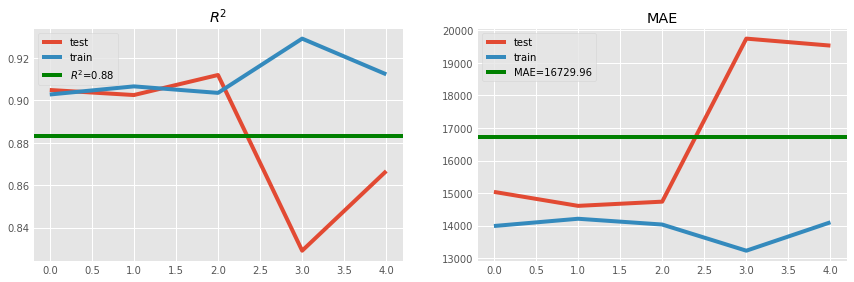

In [60]:
#ada_mae =AdaBoostRegressor(winner_mae,n_estimators=err_mae.index(min(err_mae))+1,random_state=rane) 
cv = cross_validate(adapipe1,xtrain, ytrain, cv=5, scoring=r2A_scorer,n_jobs=-1,return_train_score=True)
r2 = cv["test_my"]
mae = cv["test_mael"]
r2t = cv["test_r2"]
maet = -cv["test_neg_mean_absolute_error"]
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")
print(f"mean r2t: {r2t.mean():0.2f}")
print(f"mean maet: {maet.mean():,.2f}")
fig, axs = plt.subplots(figsize=(13,4),nrows=1, ncols=2)
axs[0].plot(r2t,label="test")
axs[0].plot(cv["train_r2"],label="train")
axs[0].set_title(r"$R^2$")
axs[0].axhline(y=r2t.mean(),label=f"$R^2$={r2t.mean():0.2f}",color="g")
axs[0].legend()
axs[1].plot(mae,label="test")
axs[1].plot(cv["train_mael"],label="train")
axs[1].set_title("MAE")
axs[1].axhline(y=mae.mean(),label=f"MAE={mae.mean():0.2f}",color="g")
axs[1].legend()

In [61]:
adapipe2=Pipeline([("preprocessor", preprocessor),('adab',AdaBoostRegressor(winner_r2,n_estimators=err_r2.index(max(err_r2))+1,random_state=rane) )])

mean r2: 0.84
mean mae: 18,433.70
mean r2t: 0.87
mean maet: 0.10


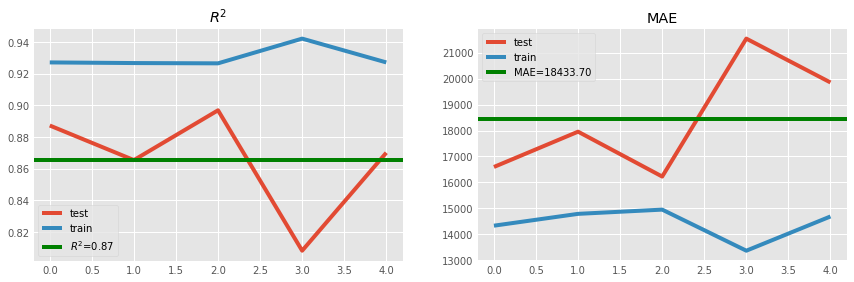

In [62]:
#ada_r2 =AdaBoostRegressor(winner_r2,n_estimators=err_r2.index(max(err_r2))+1,random_state=rane) 
cv = cross_validate(adapipe2,xtrain, ytrain, cv=5, scoring=r2A_scorer,n_jobs=-1,return_train_score=True)
r2 = cv["test_my"]
mae = cv["test_mael"]
r2t = cv["test_r2"]
maet = -cv["test_neg_mean_absolute_error"]
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")
print(f"mean r2t: {r2t.mean():0.2f}")
print(f"mean maet: {maet.mean():,.2f}")
fig, axs = plt.subplots(figsize=(13,4),nrows=1, ncols=2)
axs[0].plot(r2t,label="test")
axs[0].plot(cv["train_r2"],label="train")
axs[0].set_title(r"$R^2$")
axs[0].axhline(y=r2t.mean(),label=f"$R^2$={r2t.mean():0.2f}",color="g")
axs[0].legend()
axs[1].plot(mae,label="test")
axs[1].plot(cv["train_mael"],label="train")
axs[1].set_title("MAE")
axs[1].axhline(y=mae.mean(),label=f"MAE={mae.mean():0.2f}",color="g")
axs[1].legend()

**Importante- Señalar que bajo la $R^2$ los modelos tienden más a overfitting en boosting  vs. el MAE** 

**Los mejores modelos se obtienen con el voting, por tanto vamos hacer una segunda iteración de modelos haciendo un método stacking que es usar los outputs de modelos como input del siguiente....**

# Iteracion 2 Stacking

**Dado que queremos maximizar $R^2$ y minimizar el MAE vamos a utilizar las predicciones de los mejores modelos encontrados y esta(s) sera(n) el input para un siguiente modelo final...**

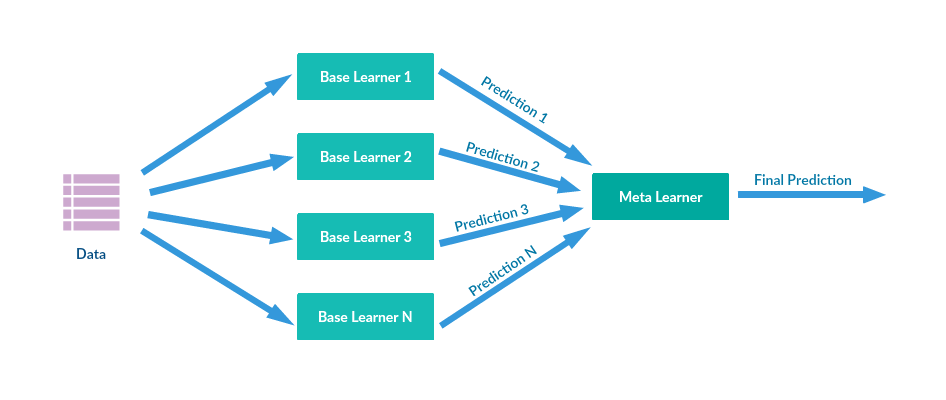

In [63]:
myImage = Image.open("Stacking.png");
myImage

**Usando el modelo de "er" de voting como el pipeline votenew aplicamos un predict a xtrain para usar esta predicción como único input de un siguiente modelo por tanto aplicaríamos una regresión simple con este input y vemos que resultados obtenemos...** 

Con respecto al gráfico de arriba sólo usaríamos 1 base learner en este caso votenew y con este haríamos la predicción final...

In [64]:
#xtrain=np.c_[neww1.fit(xtrain,ytrain).predict(xtrain),neww2.fit(xtrain,ytrain).predict(xtrain)]
xaux=votenew.fit(xtrain,ytrain).predict(xtrain).reshape(-1,1)
xaux.shape

(1168, 1)

Aplicando una regresion simple con el mejor modelo que fue voting obtenemos:

mean r2: 0.97
mean mae: 8,773.22
mean r2t: 0.97
mean maet: 0.05


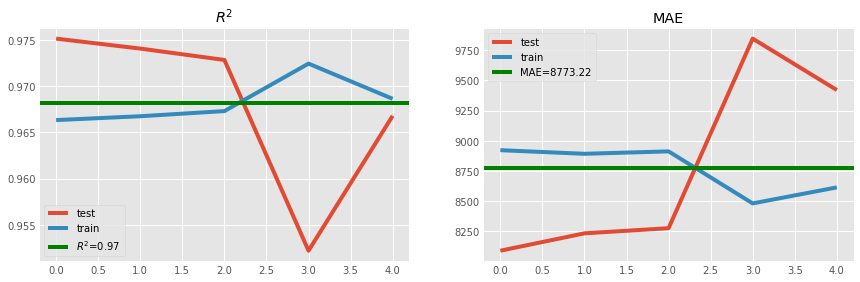

In [65]:
cv = cross_validate(LinearRegression(), xaux, ytrain, cv=5, scoring=r2A_scorer,n_jobs=1,return_train_score=True)
r2 = cv["test_my"]
mae = cv["test_mael"]
r2t = cv["test_r2"]
maet = -cv["test_neg_mean_absolute_error"]
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")
print(f"mean r2t: {r2t.mean():0.2f}")
print(f"mean maet: {maet.mean():,.2f}")
fig, axs = plt.subplots(figsize=(13,4),nrows=1, ncols=2)
axs[0].plot(r2t,label="test")
axs[0].plot(cv["train_r2"],label="train")
axs[0].set_title(r"$R^2$")
axs[0].axhline(y=r2t.mean(),label=f"$R^2$={r2t.mean():0.2f}",color="g")
axs[0].legend()
axs[1].plot(mae,label="test")
axs[1].plot(cv["train_mael"],label="train")
axs[1].set_title("MAE")
axs[1].axhline(y=mae.mean(),label=f"MAE={mae.mean():0.2f}",color="g")
axs[1].legend()

In [66]:
print(f"Por tanto los mejores resultados son r2={r2t.mean():0.2f} y MAE={mae.mean():,.2f}")

Por tanto los mejores resultados son r2=0.97 y MAE=8,773.22


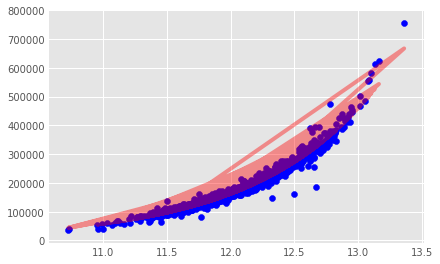

In [67]:
plt.plot(xaux,np.expm1(LinearRegression().fit(xaux,ytrain).predict(xaux)),color="r",alpha=.4)
plt.scatter(xaux,np.expm1(ytrain),color="b")

# Modelo Final

**Hacemos el pipeline final, haciendo el preprocesamiento, aplicando voting y al final una regresión lineal simple,**

Dado que el cross validation para un stacking regressor no es directo como lo veníamos haciendo crearemos una función que nos apoye a pasar xtrain y ytrain de forma directa..

In [68]:
def cvstack(modelo_base,estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False, return_estimator=False):
    xaux=modelo_base.fit(X,y).predict(X).reshape(-1,1)
    cv = cross_validate(estimator, xaux, y, groups, scoring, cv, n_jobs, verbose, fit_params, pre_dispatch, return_train_score, return_estimator)
    return(cv)

mean r2: 0.97
mean mae: 8,773.22
mean r2t: 0.97
mean maet: 0.05


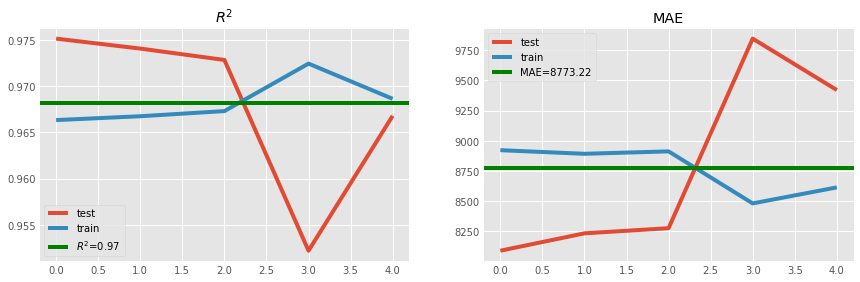

In [69]:
cv = cvstack(votenew,LinearRegression(), xtrain, ytrain, cv=5, scoring=r2A_scorer,n_jobs=1,return_train_score=True)
r2 = cv["test_my"]
mae = cv["test_mael"]
r2t = cv["test_r2"]
maet = -cv["test_neg_mean_absolute_error"]
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")
print(f"mean r2t: {r2t.mean():0.2f}")
print(f"mean maet: {maet.mean():,.2f}")
fig, axs = plt.subplots(figsize=(13,4),nrows=1, ncols=2)
axs[0].plot(r2t,label="test")
axs[0].plot(cv["train_r2"],label="train")
axs[0].set_title(r"$R^2$")
axs[0].axhline(y=r2t.mean(),label=f"$R^2$={r2t.mean():0.2f}",color="g")
axs[0].legend()
axs[1].plot(mae,label="test")
axs[1].plot(cv["train_mael"],label="train")
axs[1].set_title("MAE")
axs[1].axhline(y=mae.mean(),label=f"MAE={mae.mean():0.2f}",color="g")
axs[1].legend()

**Observaciones.-** debemos recordar que l modelo final es un stacking model donde la predicción del votenew es el input al que se le aplica una regresión lineal y se obtienen los resultados de arriba, recordemos que votenew mostraba signos de posible overfitting que en este modelo final se muestran menos... 

# Resultados

In [70]:
print(f"Por tanto los mejores resultados son r2={r2t.mean():0.2f} y MAE={mae.mean():,.2f}")

Por tanto los mejores resultados son r2=0.97 y MAE=8,773.22


Text(0.5, 1.0, 'Comparativo de $R^2$ y mAE train cv')

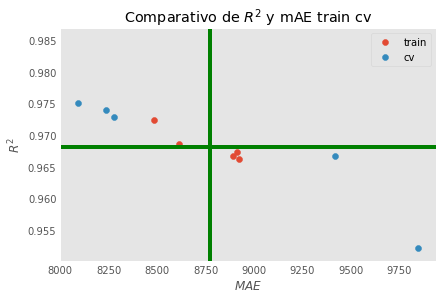

In [71]:
#plt.plot(cv["train_mael"], cv["train_r2"], label="train")
plt.scatter(cv["train_mael"], cv["train_r2"],label="train")
#plt.plot(cv["test_mael"], cv["test_r2"], label="cv",color="r")
plt.scatter(cv["test_mael"], cv["test_r2"],label="cv")
plt.xlabel(r"$MAE$")
plt.ylabel(r"$R^2$")
plt.axvline(x=mae.mean(),color="g")
plt.axhline(y=r2t.mean(),color="g")
plt.legend(); plt.grid();
plt.title(r"Comparativo de $R^2$ y mAE train cv")

# y si combinamos otros Modelos...

In [72]:
bases={'votos':votenew,"winner_mae":neww1,"winner_r2":neww2,"bagging_mae":bagnew1,"bagging_r2":bagnew1,
      "adaboost_mae":adapipe1,"adaboost_r2":adapipe2}

In [73]:
def mixmod(model_base,model_final):
    
    cv = cvstack(bases[model_base],model_final, xtrain, ytrain, cv=5, scoring=r2A_scorer,n_jobs=1,return_train_score=True)
    r2 = cv["test_my"]
    mae = cv["test_mael"]
    r2t = cv["test_r2"]
    maet = -cv["test_neg_mean_absolute_error"]
    print(f"mean r2: {r2.mean():0.2f}")
    print(f"mean mae: {mae.mean():,.2f}")
    print(f"mean r2t: {r2t.mean():0.2f}")
    print(f"mean maet: {maet.mean():,.2f}")
    fig, axs = plt.subplots(figsize=(13,4),nrows=1, ncols=2)
    axs[0].plot(r2t,label="test")
    axs[0].plot(cv["train_r2"],label="train")
    axs[0].set_title(r"$R^2$")
    axs[0].axhline(y=r2t.mean(),label=f"$R^2$={r2t.mean():0.2f}",color="g")
    axs[0].legend()
    axs[1].plot(mae,label="test")
    axs[1].plot(cv["train_mael"],label="train")
    axs[1].set_title("MAE")
    axs[1].axhline(y=mae.mean(),label=f"MAE={mae.mean():0.2f}",color="g")
    axs[1].legend()

In [74]:
interact(mixmod,model_base=list(bases.keys()),
         model_final=[LinearRegression(),Ridge(),Lasso(),DecisionTreeRegressor(),RandomForestRegressor(),
                     AdaBoostRegressor()])

interactive(children=(Dropdown(description='model_base', options=('votos', 'winner_mae', 'winner_r2', 'bagging…

<function __main__.mixmod(model_base, model_final)>

**Con este widget mostramos que no hay otra combinación mejor que la propuesta**